<a href="https://colab.research.google.com/github/Mikcy22/Buscar-de-peliculas/blob/main/NetCDF_to_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is script is prepared to extract to data from NetCDF (.nc) files and save it into CSV format

In [17]:
import xarray
import pandas as pd
import numpy as np
from google.colab import drive
!pip install netCDF4
!pip install h5netcdf


In [ ]:
file_path = '/content/drive/MyDrive/PRUEBAS SCRIPT/cnc_srf_OLIVE_2022.nc4'

# Usa el motor que sí está funcionando en tu entorno
##ds = xarray.open_dataset(file_path, engine='h5netcdf')

# Ver el contenido para conocer las variables
##ds

# Coordenadas aproximadas de Jaén
lat_jaen = 37.77
lon_jaen = -3.79

# Extraer los datos más cercanos a esas coordenadas
ds_jaen = ds.sel(lat=lat_jaen, lon=lon_jaen, method="nearest")

# Ver lo que contiene (variables, tiempo, etc.)
ds_jaen



## print(ds_jaen.data_vars)  # Para ver qué variables contiene

# Por ejemplo, si hay una variable llamada 'temperature', puedes hacer:
##ds_jaen['temperature'].plot()




In [27]:
list(ds.data_vars)

# Extraer la variable exacta (ajusta el nombre si es distinto)
pollen_var = ds['cnc_POLLEN_OLIVE_m28']  # usa list(ds.data_vars) si no sabes el nombre exacto

# Extraer datos para Jaén usando coordenadas más cercanas
pollen_jaen = pollen_var.sel(lat=37.77, lon=-3.79, method="nearest")

# Mostrar los primeros valores de polen a lo largo del tiempo
print(pollen_jaen)


<xarray.DataArray 'cnc_POLLEN_OLIVE_m28' (time: 5089, height: 1)> Size: 20kB
[5089 values with dtype=float32]
Coordinates:
  * height   (height) float32 4B 12.5
    lat      float32 4B 37.75
    lon      float32 4B -3.75
  * time     (time) datetime64[ns] 41kB 2022-01-01 ... 2022-08-01
Attributes:
    substance_name:               POLLEN_OLIVE
    silam_amount_unit:            number
    mode_name:                    
    mode_distribution_type:       FIXED_DIAMETER
    mode_nominal_diameter:        28.0000000           um
    fix_diam_mode_min_diameter:   28.0000000           um
    fix_diam_mode_max_diameter:   28.0000000           um
    fix_diam_mode_mean_diameter:  28.0000000           um
    units:                        number/m3
    long_name:                    Concentration in air POLLEN_OLIVE_m28
    least_significant_digit:      3
    cell_methods:                 time: mean


In [28]:
import pandas as pd

# Convertir la serie temporal a DataFrame
df_polen_jaen = pollen_jaen.to_dataframe().reset_index()

# Opcional: Renombrar la columna para que sea más descriptiva
df_polen_jaen.rename(columns={"cnc_POLLEN_OLIVE_m28": "polen_olivo_m28_m3"}, inplace=True)

# Guardar a CSV
df_polen_jaen.to_csv("polen_jaen.csv", index=False)

# O guardar a Excel (requiere openpyxl instalado)
df_polen_jaen.to_excel("polen_jaen.xlsx", index=False)

print("✅ Archivo exportado correctamente.")


✅ Archivo exportado correctamente.


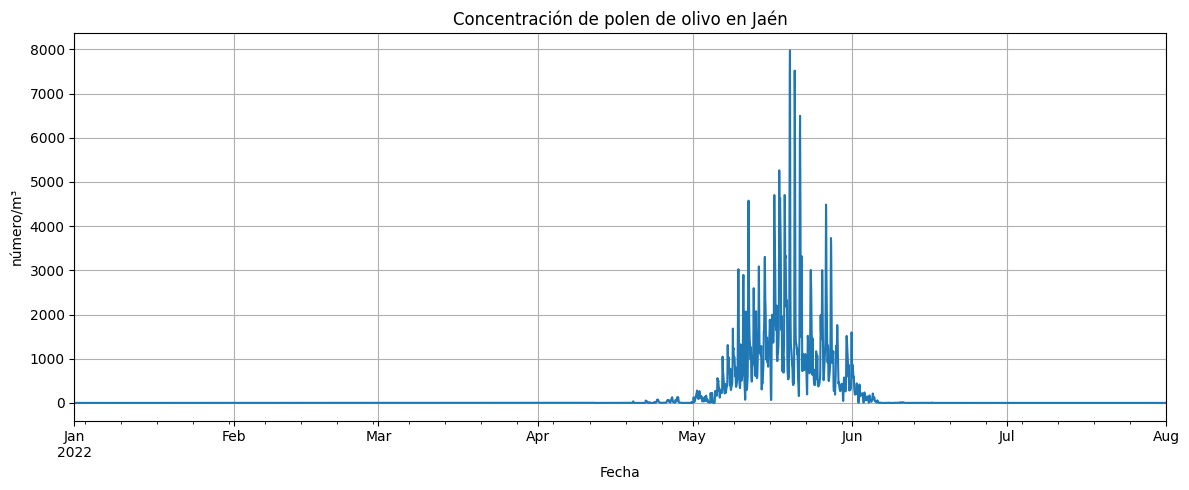

In [29]:
import matplotlib.pyplot as plt

df_polen_jaen.plot(x='time', y='polen_olivo_m28_m3', figsize=(12,5), legend=False)
plt.title("Concentración de polen de olivo en Jaén")
plt.ylabel("número/m³")
plt.xlabel("Fecha")
plt.grid(True)
plt.tight_layout()
plt.show()
